<a href="https://colab.research.google.com/github/Fileboss/INHA_DATABASE_GROUP_D/blob/main/DATABASE_Final_Assignement_Group_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold River Clinic (Database Project Group D)
The report is represented by this colab file. We explained every choice that we made for designing and implementing this database. All files used will be present in the corresponding archive available on i-class and on the GitHub project.

GitHub project: https://github.com/Fileboss/INHA_DATABASE_GROUP_D

# Context
This database aims to help the management of an private clinic. Gold River Clinic (GRC) is a private clinic that provides healthcare services to help patient to be healed. There are hundreds of patients visiting regularly. The management of all the patients, their medical prescriptions, doctors, nurses,  and appointments became a big problem. The clinic can’t handle anymore all this organisation with only paper, they need to have an information system. The company needs an effective management system to control patients flow more easily and effectively.
This clinic is the only one in the city of Incheon and has been built one month ago. The employees fastly noticed that they really need
a modern database system for efficient management of its services. Our group, composed of Philippe Baus, Mathieu Robert, Balthazar Rogue, Nazerke Zhylkybay and Diego Rodriguez are in charge of building this database. The aim is too design and develop a database that can meet all this clinic needs as specified requirements.

Thus, the database will describe the following need.

- Store information about patients, appointments they can have, medication prescriptions.
- Store data about clinic nurses and doctors. For example, the doctors have appointments with patients so we need to store it.
- Assign each patient its doctor,medications he has to take and document he owns.
- Collect appointments list with information about doctor, patient, time and price.
- Provide data about existing specializations of doctors.
- Store all important personal information, for example the address of every patient and worker in the clinic.

In order to create the database, we followed the following requirements.

A doctor is identified by his national ID of 14 characters. He has a first name and last name. Each doctor masters one specialization and can have multiple ones that are not the mastered one.

Each specialization has an identification number. This number is identified by 4 characters. The spcialization has a name and a description.

A doctor can speak one or multiple languages identified by a code of 2 char. For example, France code if 'FR'. A patient speaks only one language.

We store the address of the doctors, secreatries, patient and nurse with the address street number, street name, city name, country name and maybe some additional information about the adress (like name of the building, access code, number of the floor).

A doctor can be the referring doctor of multiple patients but a patient has only one referring doctor.

A patient is described by its national ID of 14 characters. It has a first and last name and a gender. A patient can have a nationality. The gender of the patient has to be 'M' or 'F'.

A doctor can create mulitple prescriptions for the patient so that the patient can take it. A prescription is identified by an ID. There is a date of issuance that is not mandatory. A prescription contains one or more medicines with a certain quantity.

Each medicine is identified by an ID, a name, a description and the side effects.

A patient possesses one or more medical file. These files are identified by an ID. We can store the name of the file, the type and the path of the file.

There are also nurses. If the patient need to, they can heal him. A nurse is also identified by it's national ID of 14 characters. They have a first name, a last name and a qualification level. This qualification level is between 1 and 4. A beginner has 1 and a senior nurse has 4. The qualification level can be null.

There are also secretaries that help the doctor and nurses with appointments. They are identified by the national ID of 14 characters. They have a first name, last name and a role.
The secretaries handle one or more doctor and a doctor is handled by one or more secretaries.

The secretary create a doctor appointment with the doctor and the patient. Each appointment is represented by an ID, a start date, an end date and a problem description that the doctor can fulfill after the appointment. There also a fee that must be filled after the appointment by the secretary. The doctor give the information to the secretary.

The secretary can also create a nurse appointment with a nurse and a patient. The principle is the same as doctor appointment but with the nurse.

The ID of patients, nurse, doctor and secretary is the ID national number of 14 characters.

For the doctor, secretary, patient, doctor appointment, nurse appointment, medical file, prescription, nurse: when we insert data, we need to precise at least the time when the data is created and the time when the data is changed. Moreover, we can add who created or changed the data but it's not mandatory.

Each worker or patient need to provide only one address that they consider as the main one.

It is the secretary that create and update the medical file of the patient.

The secretary find the best specialized doctor for the patient needs. If the patient say that he has cardiologic issues, she will take an appointment with a doctor specialized in cardiology.

# 1 - Data Model

As you can see, to represent the database, we use the software Looping (https://www.looping-mcd.fr/). It is more complete and easy to use than Moon modeler.

The diagram below is the entity-relationship diagram that is respecting the needs of the context above. The tables, relationships and cardinalities represent the skeleton of the database.

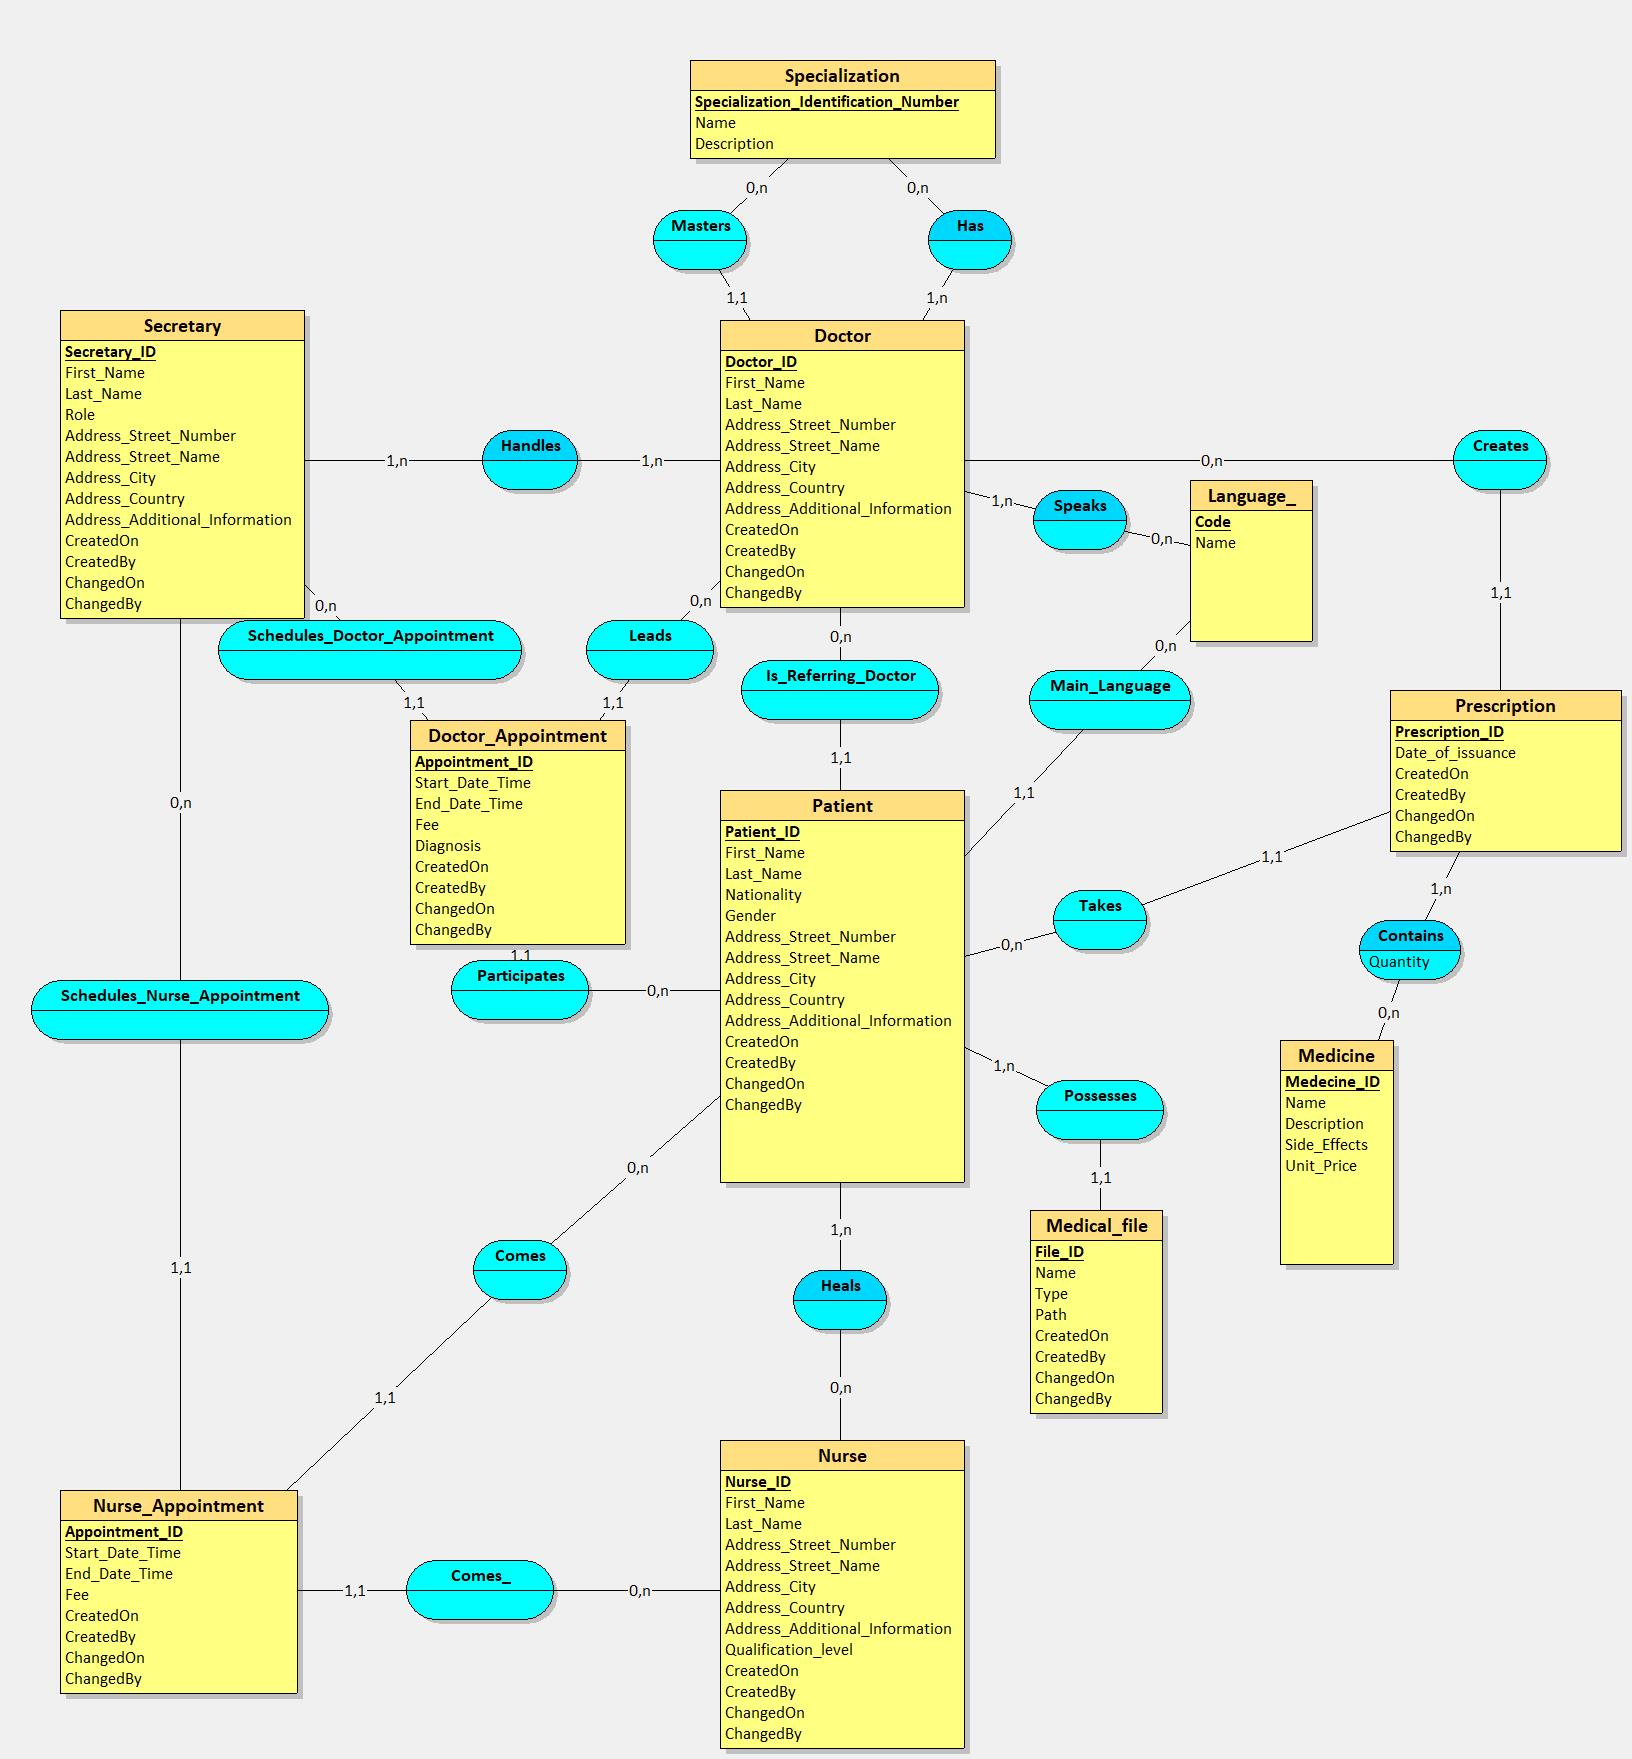

# 2 - Creating the database with scripts

Create an empty database

In [1]:
from sqlalchemy import create_engine
my_conn = create_engine("sqlite:////content/Clinic.db")
conn = my_conn.connect()

In the following statements, we will create each table one by one:

### Nurse

In [2]:
my_conn.execute('''CREATE TABLE Nurse(
   Nurse_ID CHAR(14),
   First_Name VARCHAR(20) NOT NULL,
   Last_Name VARCHAR(30) NOT NULL,
   Address_Street_Number BYTE NOT NULL,
   Address_Street_Name VARCHAR(50) NOT NULL,
   Address_City VARCHAR(50) NOT NULL,
   Address_Country VARCHAR(30) NOT NULL,
   Address_Additional_Information TEXT,
   Qualification_level BYTE,
   CreatedOn DATETIME NOT NULL,
   CreatedBy INT,
   ChangedOn DATETIME NOT NULL,
   ChangedBy INT,
   PRIMARY KEY(Nurse_ID)
   CONSTRAINT CHECK_Qualification_Level CHECK (Qualification_level > 0 AND Qualification_level < 5)
);''')

Here we added a constraint because the nurse qualitification level between 1 and 4.

### Specialization

In [3]:
my_conn.execute('''CREATE TABLE Specialization(
   Specialization_Identification_Number CHAR(4),
   Name VARCHAR(50) NOT NULL,
   Description TEXT NOT NULL,
   PRIMARY KEY(Specialization_Identification_Number)
);''')

### Medicine

In [4]:
my_conn.execute('''CREATE TABLE Medicine(
   Medicine_ID INTEGER PRIMARY KEY AUTOINCREMENT,
   Name VARCHAR(50) NOT NULL,
   Description TEXT NOT NULL,
   Side_Effects TEXT NOT NULL,
   Unit_Price DOUBLE
);''')

### Secretary

In [5]:
my_conn.execute('''CREATE TABLE Secretary(
   Secretary_ID CHAR(14),
   First_Name VARCHAR(20) NOT NULL,
   Last_Name VARCHAR(30) NOT NULL,
   Role VARCHAR(50) NOT NULL,
   Address_Street_Number BYTE NOT NULL,
   Address_Street_Name VARCHAR(50) NOT NULL,
   Address_City VARCHAR(50) NOT NULL,
   Address_Country VARCHAR(30) NOT NULL,
   Address_Additional_Information TEXT,
   CreatedOn DATETIME NOT NULL,
   CreatedBy INT,
   ChangedOn DATETIME NOT NULL,
   ChangedBy INT,
   PRIMARY KEY(Secretary_ID)
);''')

### Language_

In [6]:
my_conn.execute('''CREATE TABLE Language_(
   Code CHAR(2),
   Name VARCHAR(50) NOT NULL,
   PRIMARY KEY(Code)
);''')

### Doctor

In [7]:
my_conn.execute('''CREATE TABLE Doctor(
   Doctor_ID CHAR(14),
   First_Name VARCHAR(20) NOT NULL,
   Last_Name VARCHAR(30) NOT NULL,
   Address_Street_Number BYTE NOT NULL,
   Address_Street_Name VARCHAR(50) NOT NULL,
   Address_City VARCHAR(50) NOT NULL,
   Address_Country VARCHAR(30) NOT NULL,
   Address_Additional_Information TEXT,
   CreatedOn DATETIME NOT NULL,
   CreatedBy INT,
   ChangedOn DATETIME NOT NULL,
   ChangedBy INT,
   Specialization_Identification_Number CHAR(4) NOT NULL,
   PRIMARY KEY(Doctor_ID),
   FOREIGN KEY(Specialization_Identification_Number) REFERENCES Specialization(Specialization_Identification_Number)
);''')

### Patient

In [8]:
my_conn.execute('''CREATE TABLE Patient(
   Patient_ID CHAR(14),
   First_Name VARCHAR(20) NOT NULL,
   Last_Name VARCHAR(30) NOT NULL,
   Nationality VARCHAR(30),
   Gender CHAR(1) NOT NULL,
   Address_Street_Number BYTE NOT NULL,
   Address_Street_Name VARCHAR(50) NOT NULL,
   Address_City VARCHAR(50) NOT NULL,
   Address_Country VARCHAR(30) NOT NULL,
   Address_Additional_Information TEXT,
   Main_Language_Code CHAR(2) NOT NULL,
   Doctor_ID CHAR(14) NOT NULL,
   CreatedOn DATETIME NOT NULL,
   CreatedBy INT,
   ChangedOn DATETIME NOT NULL,
   ChangedBy INT,
   PRIMARY KEY(Patient_ID),
   FOREIGN KEY(Main_Language_Code) REFERENCES Language_(Code),
   FOREIGN KEY(Doctor_ID) REFERENCES Doctor(Doctor_ID)
   CONSTRAINT CHECK_Gender CHECK (Gender = 'M' OR Gender = 'F')
);''')

Here we added a constraint because the gender of patient has to be 'M' or 'F'.

### Prescription

In [9]:
my_conn.execute('''CREATE TABLE Prescription(
   Prescription_ID INTEGER PRIMARY KEY AUTOINCREMENT,
   Date_of_issuance DATETIME,
   CreatedOn DATETIME NOT NULL,
   CreatedBy INT,
   ChangedOn DATETIME NOT NULL,
   ChangedBy INT,
   Patient_ID CHAR(14) NOT NULL,
   Doctor_ID CHAR(14) NOT NULL,
   FOREIGN KEY(Patient_ID) REFERENCES Patient(Patient_ID),
   FOREIGN KEY(Doctor_ID) REFERENCES Doctor(Doctor_ID)
);''')

### Medical_file

In [10]:
my_conn.execute('''CREATE TABLE Medical_file(
   File_ID INTEGER PRIMARY KEY AUTOINCREMENT,
   Name VARCHAR(50) NOT NULL,
   Type VARCHAR(20) NOT NULL,
   Path VARCHAR(100) NOT NULL,
   CreatedOn DATETIME NOT NULL,
   CreatedBy INT,
   ChangedOn DATETIME NOT NULL,
   ChangedBy INT,
   Patient_ID CHAR(14) NOT NULL,
   FOREIGN KEY(Patient_ID) REFERENCES Patient(Patient_ID)
);''')

### Doctor_Appointment

In [11]:
my_conn.execute('''CREATE TABLE Doctor_Appointment(
   Appointment_ID INTEGER PRIMARY KEY AUTOINCREMENT,
   Start_Date_Time DATETIME NOT NULL,
   End_Date_Time DATETIME NOT NULL,
   Fee DOUBLE, -- Nullable because it must be filled after the appointment
   Diagnosis TEXT,
   CreatedOn DATETIME NOT NULL,
   CreatedBy INT,
   ChangedOn DATETIME NOT NULL,
   ChangedBy INT,
   Secretary_ID CHAR(14) NOT NULL,
   Patient_ID CHAR(14) NOT NULL,
   Doctor_ID CHAR(14) NOT NULL,
   FOREIGN KEY(Secretary_ID) REFERENCES Secretary(Secretary_ID),
   FOREIGN KEY(Patient_ID) REFERENCES Patient(Patient_ID),
   FOREIGN KEY(Doctor_ID) REFERENCES Doctor(Doctor_ID)
);''')

### Nurse_Appointment

In [12]:
my_conn.execute('''CREATE TABLE Nurse_Appointment(
   Appointment_ID INTEGER PRIMARY KEY AUTOINCREMENT,
   Start_Date_Time DATETIME NOT NULL,
   End_Date_Time DATETIME NOT NULL,
   Fee DOUBLE, -- Nullable because it must be filled after the appointment
   CreatedOn DATETIME NOT NULL,
   CreatedBy INT,
   ChangedOn DATETIME NOT NULL,
   ChangedBy INT,
   Nurse_ID CHAR(14) NOT NULL,
   Secretary_ID CHAR(14) NOT NULL,
   Patient_ID CHAR(14) NOT NULL,
   FOREIGN KEY(Nurse_ID) REFERENCES Nurse(Nurse_ID),
   FOREIGN KEY(Secretary_ID) REFERENCES Secretary(Secretary_ID),
   FOREIGN KEY(Patient_ID) REFERENCES Patient(Patient_ID)
);''')

### Has

In [13]:
my_conn.execute('''CREATE TABLE Has(
   Doctor_ID CHAR(14),
   Specialization_Identification_Number CHAR(4),
   PRIMARY KEY(Doctor_ID, Specialization_Identification_Number),
   FOREIGN KEY(Doctor_ID) REFERENCES Doctor(Doctor_ID),
   FOREIGN KEY(Specialization_Identification_Number) REFERENCES Specialization(Specialization_Identification_Number)
);''')

### Contains

In [14]:
my_conn.execute('''CREATE TABLE Contains(
   Medicine_ID INT,
   Prescription_ID INT,
   Quantity INT,
   PRIMARY KEY(Medicine_ID, Prescription_ID),
   FOREIGN KEY(Medicine_ID) REFERENCES Medicine(Medicine_ID),
   FOREIGN KEY(Prescription_ID) REFERENCES Prescription(Prescription_ID)
);''')

### Handles

In [15]:
my_conn.execute('''CREATE TABLE Handles(
   Doctor_ID CHAR(14),
   Secretary_ID CHAR(14),
   PRIMARY KEY(Doctor_ID, Secretary_ID),
   FOREIGN KEY(Doctor_ID) REFERENCES Doctor(Doctor_ID),
   FOREIGN KEY(Secretary_ID) REFERENCES Secretary(Secretary_ID)
);''')

### Heals

In [16]:
my_conn.execute('''CREATE TABLE Heals(
   Patient_ID CHAR(14),
   Nurse_ID CHAR(14),
   PRIMARY KEY(Patient_ID, Nurse_ID),
   FOREIGN KEY(Patient_ID) REFERENCES Patient(Patient_ID),
   FOREIGN KEY(Nurse_ID) REFERENCES Nurse(Nurse_ID)
);''')

### Speaks

In [17]:
my_conn.execute('''CREATE TABLE Speaks(
   Doctor_ID CHAR(14),
   Code_Language CHAR(2),
   PRIMARY KEY(Doctor_ID, Code_Language),
   FOREIGN KEY(Doctor_ID) REFERENCES Doctor(Doctor_ID),
   FOREIGN KEY(Code_Language) REFERENCES Language_(Code)
);''')

### Request the database in order to check if every table has correctly been created

In [18]:
r_set = my_conn.execute('''select name from sqlite_master 
  where type = 'table' ''')
for row in r_set:
  print(row)

('Nurse',)
('Specialization',)
('Medicine',)
('sqlite_sequence',)
('Secretary',)
('Language_',)
('Doctor',)
('Patient',)
('Prescription',)
('Medical_file',)
('Doctor_Appointment',)
('Nurse_Appointment',)
('Has',)
('Contains',)
('Handles',)
('Heals',)
('Speaks',)


We can see that every table has been created

# 3 - Triggers
Now, we have to insert trigger in order to prevent the user to insert data that is not possible and that can break the system. For example if the secretary wants to book an appointment for a doctor that already has an appointment on the same time slot.


This is the triggers we identified in this model.
- For the doctors, secretaries, nurses, patients, medicines, prescriptions, doctor appointments and nurse appointments, it automatically insert the timestamp and user that inserted or changed the table.
- A patient can't have overlapping appointments with doctor or nurse.
- A nurse can't have overlapping appointments with a patient.
- A doctor can't have overlapping appointments with a patient.

### Trg_Insert_Doctor

This firs trigger has benn designed to automatically update the administration layer information when a doctor is inserted.
However, we did not manage to make it work.

In [19]:
#my_conn.execute('''CREATE TRIGGER IF NOT EXISTS Trg_Insert_Doctor
#   BEFORE INSERT 
#   ON Doctor
#   FOR EACH ROW
#   BEGIN
#      SET NEW.CreatedOn = CURRENT_TIMESTAMP;
#      SET NEW.CreatedBy = USER();
#      SET NEW.ChangedOn = CURRENT_TIMESTAMP;
#      SET NEW.ChangedBy = USER();
#   END;''')

### Trg_Update_Doctor

In [20]:
#my_conn.execute('''CREATE TRIGGER IF NOT EXISTS Trg_Update_Doctor
#    BEFORE UPDATE 
#    ON Doctor
#    FOR EACH ROW
#    BEGIN
#        SET NEW.ChangedOn = CURRENT_TIMESTAMP;
#        SET NEW.ChangedBy = USER();
#    END;''')

This firs trigger has benn designed to automatically update the administration layer information when a doctor is updated.
However, we did not manage to make it work.
*Note that we planed to do the same king of trigger for each tables that contains CreatedOn, CreatedBy, ChangedOn and ChangedBy*

The purpose od the next 4 trigger is to ensure that there is no overlaping when an appointment is created

### Trg_Doctor_Doctor_Appointment_Overlap

In [21]:
my_conn.execute('''
CREATE TRIGGER IF NOT EXISTS Trg_Doctor_Doctor_Appointment_Overlap
    BEFORE INSERT 
    ON Doctor_Appointment
    FOR EACH ROW
      WHEN (( SELECT COUNT (*) 
          FROM Doctor_Appointment
          WHERE Doctor_ID = NEW.Doctor_ID 
          AND NEW.Start_Date_Time <= Doctor_Appointment.End_Date_Time 
          AND NEW.End_Date_Time > Doctor_Appointment.Start_Date_Time)) > 0 
      BEGIN
          SELECT RAISE(ABORT, 'Doctor already has an appointment at this time');
      END;
''')

### Trg_Patient_Doctor_Appointment_Overlap

In [22]:
my_conn.execute('''
CREATE TRIGGER IF NOT EXISTS Trg_Patient_Doctor_Appointment_Overlap
    BEFORE INSERT 
    ON Doctor_Appointment
    FOR EACH ROW
    WHEN  
        (SELECT COUNT (*) 
        FROM Doctor_Appointment
        WHERE Patient_ID = NEW.Patient_ID 
        AND((NEW.Start_Date_Time <= Doctor_Appointment.End_Date_Time 
        AND NEW.End_Date_Time > Doctor_Appointment.Start_Date_Time))) > 0
    BEGIN
        SELECT RAISE(ABORT, 'Patient already has an appointment at this time');
    END;''')

### Trg_Nurse_Nurse_Appointment_Overlap

In [23]:
my_conn.execute('''
CREATE TRIGGER IF NOT EXISTS Trg_Nurse_Nurse_Appointment_Overlap -- Prevents a nurse from having two appointments at the same time
    BEFORE INSERT 
    ON Nurse_Appointment
    FOR EACH ROW
    WHEN 
        (SELECT COUNT(*) 
        FROM Nurse_Appointment
        WHERE Nurse_ID = NEW.Nurse_ID 
        AND((NEW.Start_Date_Time <= Nurse_Appointment.End_Date_Time 
        AND NEW.End_Date_Time > Nurse_Appointment.Start_Date_Time))) > 0
    BEGIN
        SELECT RAISE(ABORT, 'Nurse already has an appointment at this time');
    END;''')

### Trg_Patient_Nurse_Appointment_Overlap

In [24]:
my_conn.execute('''
CREATE TRIGGER IF NOT EXISTS Trg_Patient_Nurse_Appointment_Overlap
    BEFORE INSERT 
    ON Nurse_Appointment
    FOR EACH ROW
    WHEN 
        (SELECT COUNT(*) 
        FROM Nurse_Appointment
        WHERE Patient_ID = NEW.Patient_ID 
        AND((NEW.Start_Date_Time <= Nurse_Appointment.End_Date_Time 
        AND NEW.End_Date_Time > Nurse_Appointment.Start_Date_Time))) > 0
    BEGIN
        SELECT RAISE(ABORT, 'Patient already has an appointment at this time');
    END;''')

# 4 - Inserting data

In [25]:
import requests
url = 'https://pastebin.com/raw/DAjvxfsB'
r = requests.get(url)
queries = r.text
print (type(queries))
queries_lines = queries.splitlines()
for query in queries_lines:
   my_conn.execute(query)

<class 'str'>


### Try to SELECT * on a few table to check if the data has correctly been inserted

In [26]:
query = ('''SELECT *
FROM Doctor
;''')
results=my_conn.execute(query)
for row in results:
  print(row)

('DOC12345678900', 'Pierre', 'Valentin', 123, 'Main Street', 'Toulouse', 'France', 'Additional Information', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None, 'SPC12345678900')
('DOC12345678901', 'Jean', 'Dupont', 11, 'Rue de la Paix', 'Paris', 'France', 'Additional Information', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None, 'SPC12345678901')


In [27]:
query = ('''SELECT *
FROM Patient
;''')
results=my_conn.execute(query)
for row in results:
  print(row)

('PAT12345678900', 'Peter', 'Parker', ' American', 'M', 123, 'Main Street', 'New York', 'USA', 'Additional Information', 'EN', 'DOC12345678900', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None)
('PAT12345678901', 'Bruce', 'Wayne', ' American', 'M', 11, 'Rue de la Paix', 'Paris', 'France', 'Additional Information', 'EN', 'DOC12345678900', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None)
('PAT12345678902', 'Tony', 'Stark', ' American', 'M', 123, 'Main Street', 'New York', 'USA', 'Additional Information', 'EN', 'DOC12345678901', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None)


In [28]:
query = ('''SELECT *
FROM Nurse
;''')
results=my_conn.execute(query)
for row in results:
  print(row)

('NRS12345678900', 'Maelie', 'Cheng Peng', 123, 'Main Street', 'Bordeaux', 'France', 'Additional Information', 2, '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None)
('NRS12345678901', 'Elyne', 'Qiu', 11, 'Rue de la Paix', 'Paris', 'France', 'Additional Information', 2, '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None)
('NRS12345678902', 'Léa', 'Liu', 123, 'Main Street', 'Bordeaux', 'France', 'Additional Information', 2, '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None)


In [29]:
query = ('''SELECT *
FROM Doctor_Appointment
;''')
results=my_conn.execute(query)
for row in results:
  print(row)

(1, '2020-01-01 10:00:00', '2022-01-01 11:00:00', 100.0, 'Diagnosis 1', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None, 'SEC12345678900', 'PAT12345678900', 'DOC12345678900')
(2, '2020-01-01 10:00:00', '2022-01-01 11:00:00', 100.0, 'Diagnosis 2', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None, 'SEC12345678901', 'PAT12345678901', 'DOC12345678901')


# 5 - SQL REQUEST:
Now that we have our database, we can request it to retrieve the data we want.

### Update the specialization of a doctor.

In [30]:
query = ('''SELECT D.Specialization_Identification_Number, D.First_Name, D.Last_Name
FROM Doctor D
WHERE D.Doctor_ID = "DOC12345678900";''')
results=my_conn.execute(query)
for row in results:
  print(row)

queryUpdate = ('''UPDATE Doctor
SET Specialization_Identification_Number = "SPC12345678902" , ChangedOn = CURRENT_TIMESTAMP
WHERE Doctor_ID = "DOC12345678900";''')
my_conn.execute(queryUpdate)

results=my_conn.execute(query)
for row in results:
  print(row)

('SPC12345678900', 'Pierre', 'Valentin')
('SPC12345678902', 'Pierre', 'Valentin')


### Get all the appointments of a doctor.


In [32]:
query = ('''SELECT DA.Start_Date_Time, DA.End_Date_Time, D.First_Name, D.Last_Name, P.First_Name, P.Last_Name
FROM Doctor_Appointment DA, Doctor D, Patient P
WHERE D.Doctor_ID = "DOC12345678900"
AND DA.Doctor_ID = D.Doctor_ID
AND DA.Patient_ID = P.Patient_ID;''')
results=my_conn.execute(query)
for row in results:
  print(row)

('2020-01-01 10:00:00', '2022-01-01 11:00:00', 'Pierre', 'Valentin', 'Peter', 'Parker')


### Delete a doctor from the database.

In [33]:
query = ('''SELECT * FROM Doctor D;''')
results=my_conn.execute(query)
print("BEFORE DELETE:")
for row in results:
  print(row)

queryDelete = ('''DELETE FROM Doctor
WHERE Doctor_ID = "DOC12345678900";''')
my_conn.execute(queryDelete)

print("\n\nAFTER DELETE:")
results=my_conn.execute(query)
for row in results:
  print(row)

BEFORE DELETE:
('DOC12345678900', 'Pierre', 'Valentin', 123, 'Main Street', 'Toulouse', 'France', 'Additional Information', '2022-12-06 10:14:00', None, '2022-12-06 10:14:13', None, 'SPC12345678902')
('DOC12345678901', 'Jean', 'Dupont', 11, 'Rue de la Paix', 'Paris', 'France', 'Additional Information', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None, 'SPC12345678901')


AFTER DELETE:
('DOC12345678901', 'Jean', 'Dupont', 11, 'Rue de la Paix', 'Paris', 'France', 'Additional Information', '2022-12-06 10:14:00', None, '2022-12-06 10:14:00', None, 'SPC12345678901')


### Find all patients who have been prescribed paracetamol.

In [34]:
query = ('''SELECT P.Patient_ID, P.First_Name, P.Last_Name
FROM Patient P, Prescription PRE, Contains C, Medicine M
WHERE M.Name = "Paracetamol"
AND C.Medicine_ID = M.Medicine_ID
AND C.Prescription_ID = PRE.Prescription_ID
AND PRE.Patient_ID = P.Patient_ID;''')
results=my_conn.execute(query)
for row in results:
  print(row)

('PAT12345678900', 'Peter', 'Parker')
('PAT12345678901', 'Bruce', 'Wayne')


# 6 - Conclusion

This work allowed us to put all the database creation and administration methods we learned in class into practice.
Moreover, this group exercise allowed us to develop our sense of teamwork, and to apply work methods using collaborative tools such as Google Collab or Github.
This will be very useful in our future professional life.